In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부시간 X와 성적 Y의 리스트를 만듭니다.
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]
data

[[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

In [3]:
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

In [4]:
x_data

[2, 4, 6, 8, 10, 12, 14]

In [5]:
y_data

[0, 0, 0, 1, 1, 1, 1]

(-0.1, 1.1)

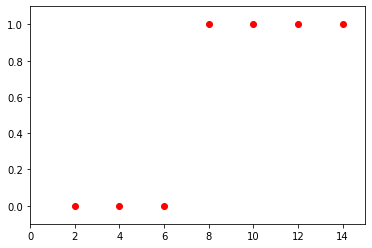

In [14]:
# 그래프로 나타내 봅니다.
plt.scatter(x_data, y_data, color='r')
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

In [15]:
# 기울기 a와 절편 b의 값을 초기화 합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.05

In [16]:
# 시그모이드 함수를 정의합니다.
def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

In [17]:
# 경사 하강법을 실행합니다.
for i in range(2001):
    for x_data, y_data in data:
        a_diff = x_data * (sigmoid(a*x_data + b) - y_data)
        b_diff = sigmoid(a*x_data + b) - y_data
        a = a - lr * a_diff
        b = b - lr * b_diff
        if i % 1000 == 0:    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
            print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))

epoch=0, 기울기=-0.0500, 절편=-0.0250
epoch=0, 기울기=-0.1388, 절편=-0.0472
epoch=0, 기울기=-0.2268, 절편=-0.0619
epoch=0, 기울기=0.1201, 절편=-0.0185
epoch=0, 기울기=0.2374, 절편=-0.0068
epoch=0, 기울기=0.2705, 절편=-0.0040
epoch=0, 기울기=0.2860, 절편=-0.0029
epoch=1000, 기울기=1.4978, 절편=-9.9401
epoch=1000, 기울기=1.4940, 절편=-9.9411
epoch=1000, 기울기=1.4120, 절편=-9.9547
epoch=1000, 기울기=1.4949, 절편=-9.9444
epoch=1000, 기울기=1.4982, 절편=-9.9440
epoch=1000, 기울기=1.4984, 절편=-9.9440
epoch=1000, 기울기=1.4985, 절편=-9.9440
epoch=2000, 기울기=1.9065, 절편=-12.9489
epoch=2000, 기울기=1.9055, 절편=-12.9491
epoch=2000, 기울기=1.8515, 절편=-12.9581
epoch=2000, 기울기=1.9057, 절편=-12.9514
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513
epoch=2000, 기울기=1.9068, 절편=-12.9513


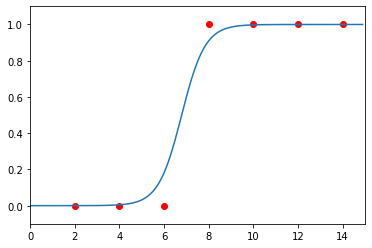

In [18]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

# 실제값
plt.scatter(x_data, y_data, color='r')
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)

# 모델로 예측한 예측값
x_range = (np.arange(0, 15, 0.1)) # 그래프로 나타낼 x값의 범위를 정합니다.
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
plt.show()

epoch=0, 기울기=0.1143, 절편=0.0036


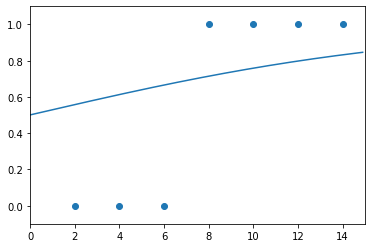

epoch=1000, 기울기=0.6151, 절편=-3.9134


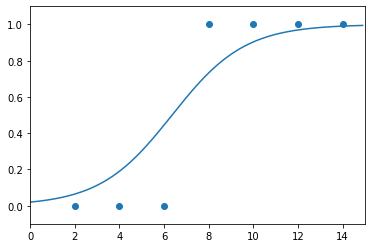

epoch=2000, 기울기=0.8313, 절편=-5.5174


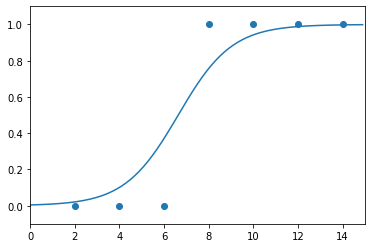

In [19]:
# UPDATE

# 책의 코드는 각각의 x에 대한 기울기, 절편의 변화가 epoch마다 모두 출력 되어 이를 확인하게 끔 되어 있습니다.
# 평균값을 구해 하나의 기울기와 절편을 출력하고, 1000 epoch마다 그래프를 그리면 다음과 같습니다.  

# 데이터 선언 
x = [i[0] for i in data]
y = [i[1] for i in data]
x_data = np.array(x)
y_data = np.array(y)

# 위에 계산된 a와 b의 값이 다시 사용되지 않기 위해 각각 0으로 초기화 합니다.
a = 0
b = 0

# 경사 하강법을 실행합니다.
for i in range(2001):
    a_diff = (1/len(x_data))*sum(x_data*(sigmoid(a*x_data + b) - y_data)) 
    b_diff = (1/len(x_data))*sum(sigmoid(a*x_data + b) - y_data)
    a = a - lr * a_diff
    b = b - lr * b_diff
    
    # 1000번 반복될 때마다 각 x_data값에 대한 현재의 a값, b값을 출력합니다.
    if i % 1000 == 0:    
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        plt.scatter(x_data, y_data)
        plt.xlim(0, 15)
        plt.ylim(-.1, 1.1)
        x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위를 정합니다.
        plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
        plt.show()